In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-survival-of-patients-with-heart-failure/heart_failure_clinical_records_dataset.csv


In [3]:
df=pd.read_csv("/kaggle/input/predict-survival-of-patients-with-heart-failure/heart_failure_clinical_records_dataset.csv")
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [6]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

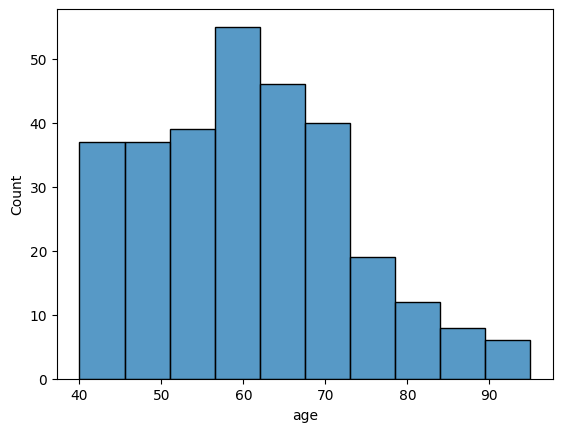

In [8]:
sns.histplot(x="age",data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

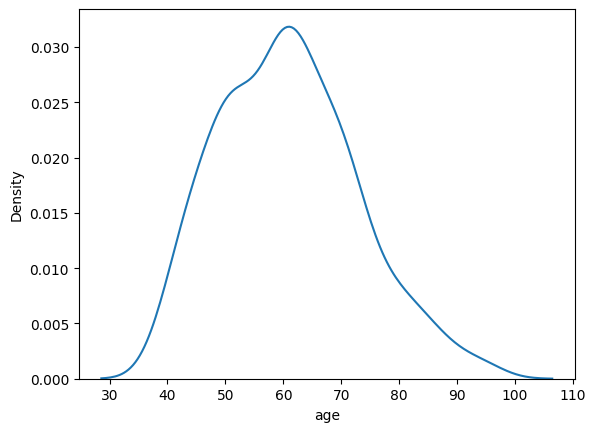

In [9]:
sns.kdeplot(x="age",data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='age', ylabel='Density'>

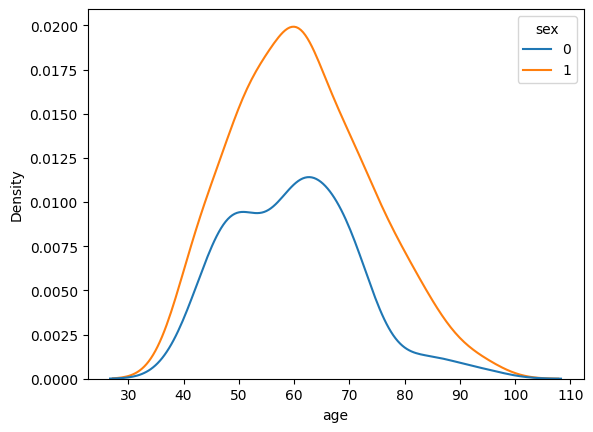

In [ ]:
sns.kdeplot(x="age",hue="sex",data=df)

In [18]:
df["anaemia"].value_counts()

anaemia
0    170
1    129
Name: count, dtype: int64

<Axes: xlabel='anaemia', ylabel='count'>

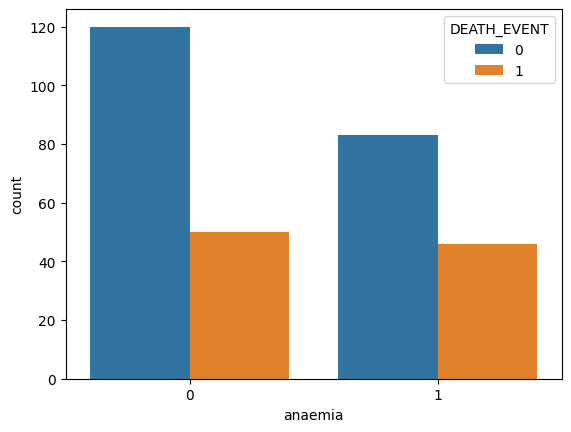

In [21]:
sns.countplot(x="anaemia",hue="DEATH_EVENT",data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

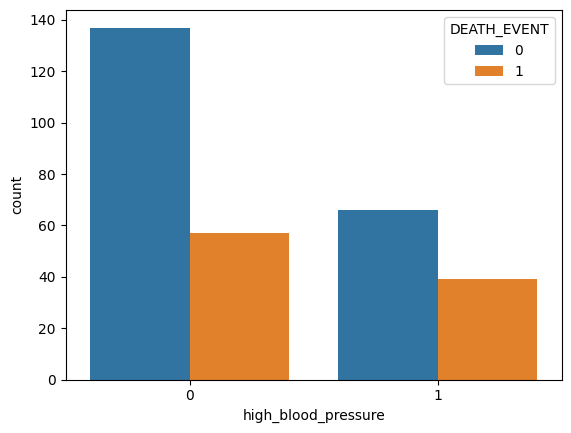

In [22]:
sns.countplot(x="high_blood_pressure",hue="DEATH_EVENT",data=df)

In [25]:
df["time"].value_counts()

time
250    7
187    7
10     6
186    6
107    6
      ..
97     1
96     1
86     1
77     1
285    1
Name: count, Length: 148, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

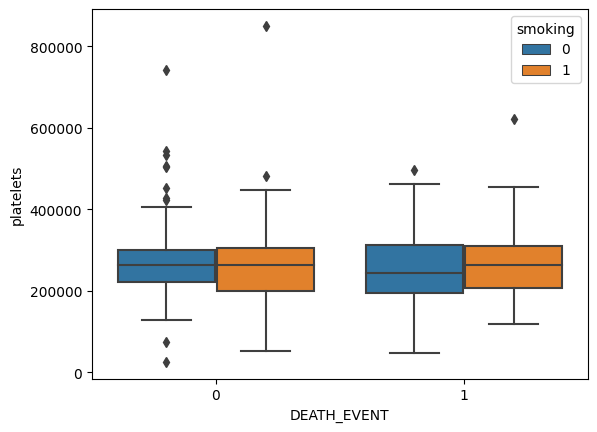

In [28]:
sns.boxplot(x="DEATH_EVENT",y="platelets",hue="smoking",data=df)

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

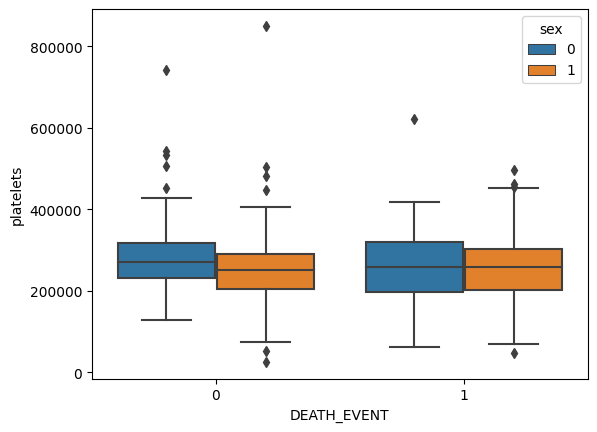

In [29]:
sns.boxplot(x="DEATH_EVENT",y="platelets",hue="sex",data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

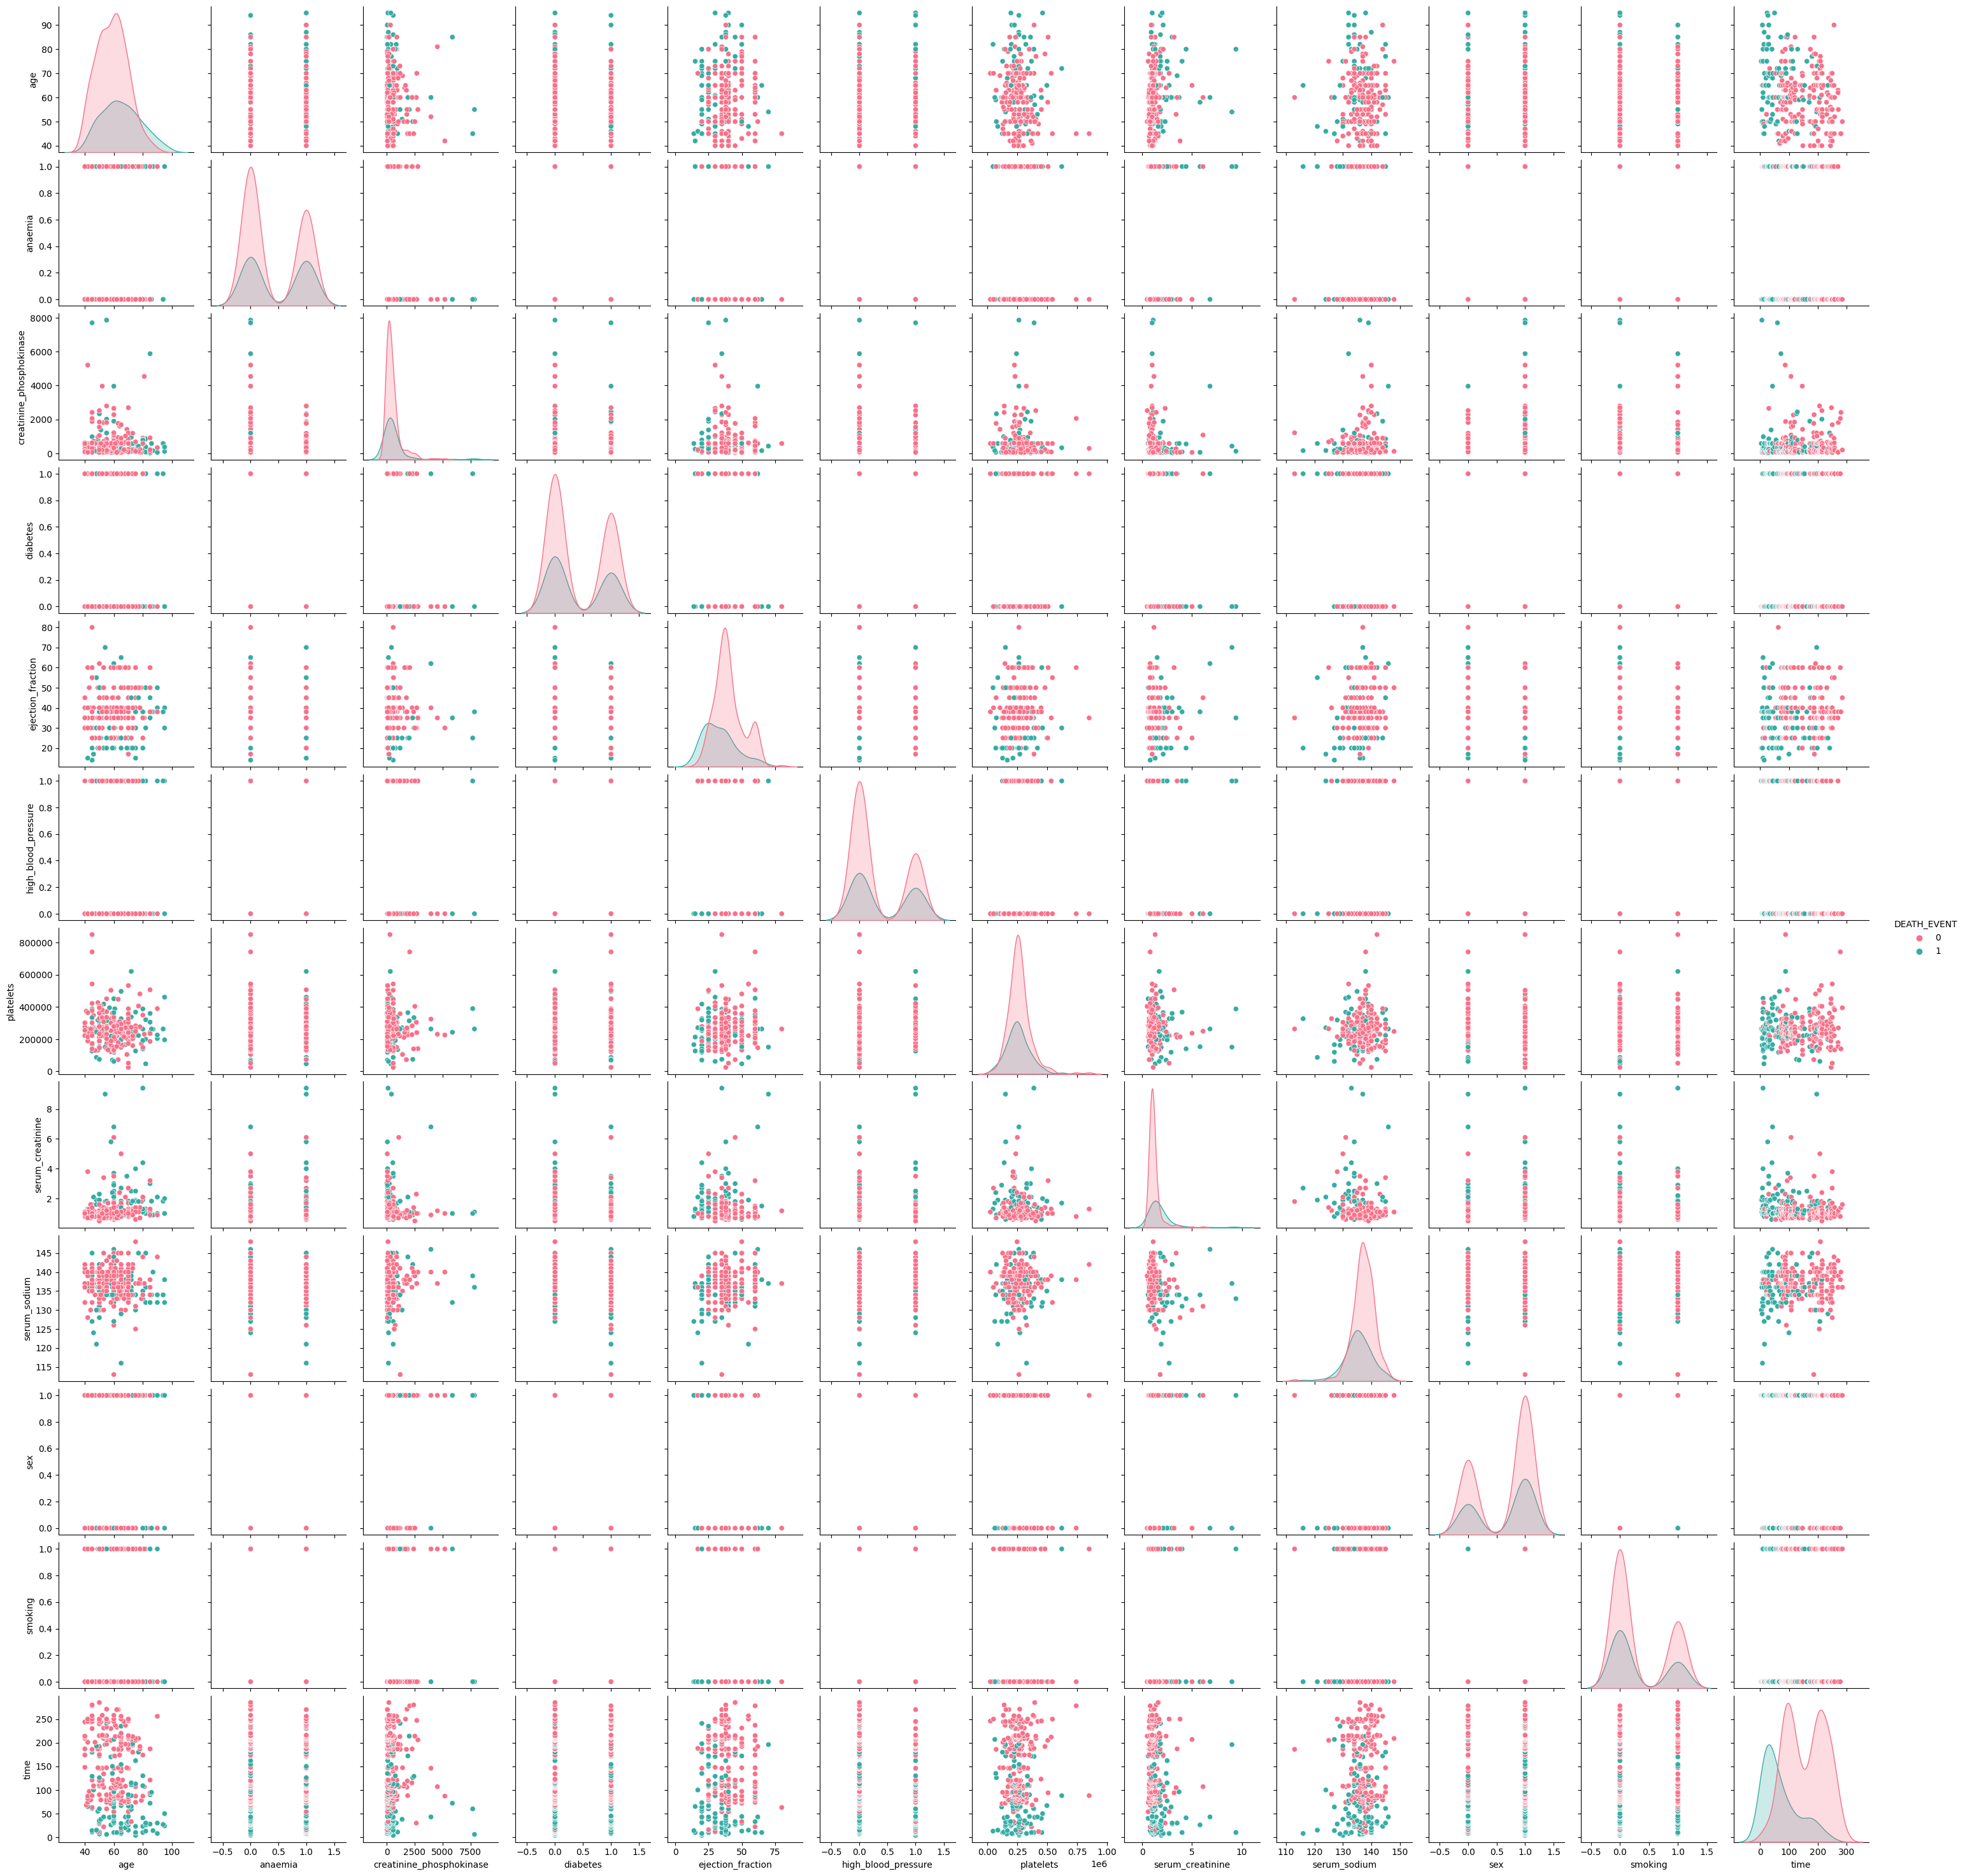

In [30]:
sns.pairplot(data=df,hue="DEATH_EVENT",diag_kind="kde", palette="husl")

In [35]:
import matplotlib.pyplot as plt

<Axes: >

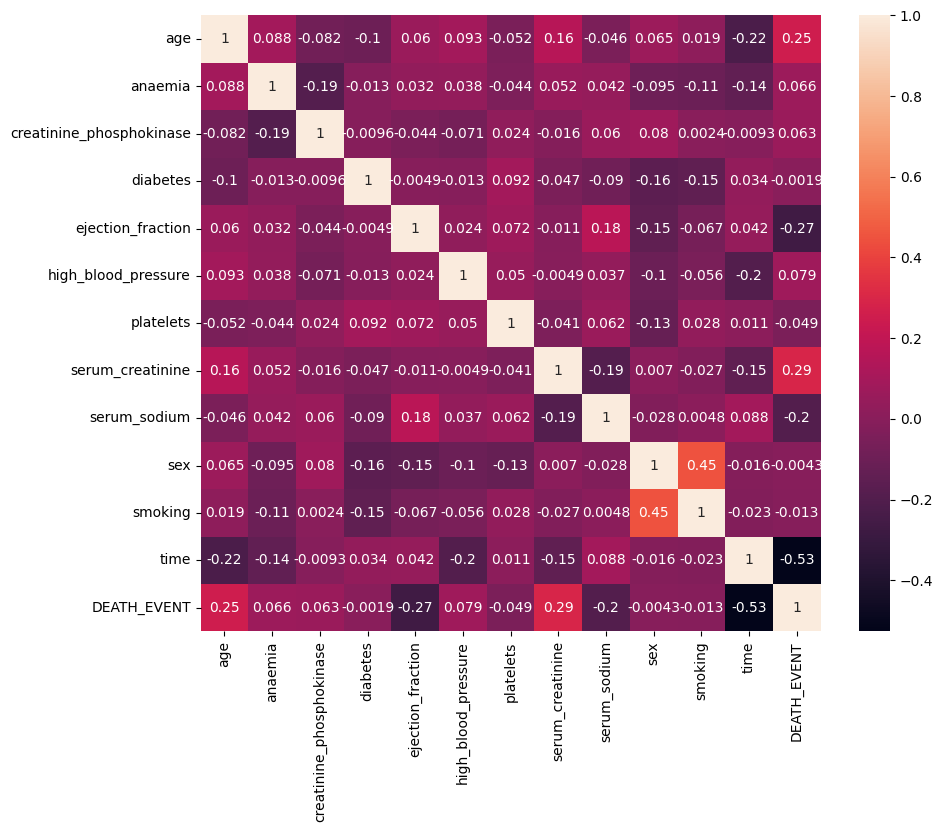

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True)

In [38]:
x=df.drop("DEATH_EVENT",axis=1)
y=df["DEATH_EVENT"]

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [44]:
y_test.value_counts()

DEATH_EVENT
0    35
1    25
Name: count, dtype: int64

In [45]:
y_train.value_counts()

DEATH_EVENT
0    168
1     71
Name: count, dtype: int64

In [52]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()

In [53]:
ran.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_pred=ran.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)

In [56]:
acc

0.7333333333333333

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
MLmodels = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Decision Tree": DecisionTreeClassifier()}

# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [61]:
ScoringModels = fit_and_score(models=MLmodels,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
ScoringModels

{'KNN': 0.5333333333333333,
 'Logistic Regression': 0.8,
 'Decision Tree': 0.6333333333333333}

<Axes: >

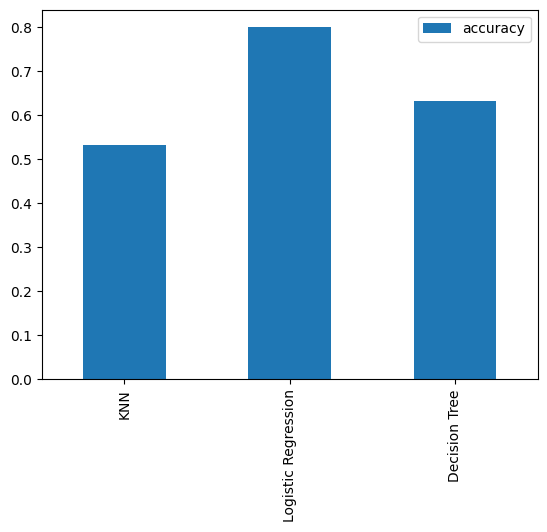

In [62]:
CompareModels = pd.DataFrame(ScoringModels, index=['accuracy'])
CompareModels.T.plot.bar()

LOGISTIC REG

In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [67]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

np.random.seed(35)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [68]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [70]:
rs_log_reg.score(x_test, y_test)

0.7833333333333333

In [72]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [73]:
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [74]:
y_preds = gs_log_reg.predict(x_test)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



In [76]:
from xgboost import XGBClassifier

In [77]:
model = XGBClassifier()

# fit the model with the training data
model.fit(x_train,y_train)


# predict the target on the train dataset
predict = model.predict(x_test)
print('\nTarget on train data',predict) 


Target on train data [0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1]
